In [ ]:
import spacy
from spacy_layout import spaCyLayout
from pipeline_merge_pdf import process_pdf_folder
import os
import time

#Ordner, in dem PDFs liegen
#pdf_folder = "../data/DSA/Der_blaue_Bruder"
pdf_folder = "../data/DSA/Die_Stadt_des_Feuers"
merged_pdf_path = os.path.join(pdf_folder, "_combined.pdf")

#Prüfen ob eine merged-Datei bereits vorhanden ist. Falls nicht, diese erzeugen
if os.path.exists(merged_pdf_path):
    print("Die Datei _combined.pdf existiert bereits unter folgendem Pfad:",merged_pdf_path)
    print("Lade die Datei lokal..\n")
    time.sleep(0.5)
    nlp = spacy.blank("de")
    layout = spaCyLayout(nlp)
    doc = layout(merged_pdf_path)
else:
    print("Die Datei _combined.pdf existiert noch nicht. Merge-Pipeline wird durchgeführt..")
    time.sleep(0.5)
    #Pipeline ausführen
    doc = process_pdf_folder(pdf_folder)

#spaCy-Doc
print("\nAnzahl Layout-Spans:", len(doc.spans["layout"]))


Die Datei _combined.pdf existiert noch nicht. Merge-Pipeline wird durchgeführt..

Gefundene PDF-Dateien:
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_1.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_2.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_3.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_4.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_5.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_6.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_7.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_8.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_9.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_10.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_11.pdf

🔄 PDFs werden zusammengeführt...



PDFs mergen: 100%|██████████| 11/11 [00:00<00:00, 322.31it/s]
2025-11-27 20:57:35,177 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-11-27 20:57:35,196 - INFO - Going to convert document batch...
2025-11-27 20:57:35,197 - INFO - Initializing pipeline for StandardPdfPipeline with options hash f9730ffaa6e7f8d4fb0c98c8df3f18cb
2025-11-27 20:57:35,198 - INFO - rapidocr cannot be used because onnxruntime is not installed.
2025-11-27 20:57:35,199 - INFO - easyocr cannot be used because it is not installed.
2025-11-27 20:57:35,200 - INFO - Accelerator device: 'cuda:0'
[INFO] 2025-11-27 20:57:35,207 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2025-11-27 20:57:35,213 [RapidOCR] download_file.py:60: File exists and is valid: /home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/rapidocr/models/ch_PP-OCRv4_det_infer.pth
[INFO] 2025-11-27 20:57:35,213 [RapidOCR] torch.py:54: Using /home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13


✅ Erfolgreich gemerged zu: ../data/DSA/Die_Stadt_des_Feuers/_combined.pdf

📄 spaCyLayout liest das kombinierte PDF ein...



2025-11-27 20:57:35,406 - INFO - Auto OCR model selected rapidocr with torch.
2025-11-27 20:57:35,406 - INFO - Accelerator device: 'cuda:0'
2025-11-27 20:57:36,270 - INFO - Accelerator device: 'cuda:0'
2025-11-27 20:57:36,524 - INFO - Processing document _combined.pdf
2025-11-27 20:57:52,156 - INFO - Finished converting document _combined.pdf in 16.98 sec.


spaCy-Model und -Wrapper geladen.

Gesamtlänge des Textes: 184820

Anzahl Layout-Spans: 1626


In [139]:
from pipeline_preproc_pdf import process_doc_into_posts

#Posts extrahieren + bereinigen
posts = process_doc_into_posts(doc)

#Posts ausgeben
for i, p in enumerate(posts):
    print(f"--- Post {i+1} ---\n{p}\n")

--- Post 1 ---
Die Stadt des Feuers Der Neunaugensee Dunkel breitet sich das sehr tiefe Wasser, das bis an den Horizont im fernen Norden den Himmel berührt. Träge schlagen die Wellen an das Ufer an dem  sich das Schilf im sanften Wind wiest. In der weiten Ferne im glitzernden Wasser ragt majestätisch ein schwarzer Berg aus den Wellen und weißer Rauch steigt von seiner Spitze auf. Fern und doch unheimlich. Das ist Cealan, die verwunschene Insel die jeder Schiffer meidet. Sanfte Hügel und Wälder mit Gehöften und kleinen Dörfern dazwischen erstrecken sich dem gegenüber  ebenso  weit in den Süden. Und dazwischen verläuft die schier endlose Straße 60  Meilen zwischen der geschäftigen Stadt Trallop im Osten und dem  verschlafenen größeren Markt-Dorf Olat mit seiner Grafenburg Olats Feste, am  Rande  des riesigen Nebelmoores im Westen davon. Mehr  als ein Tagesmarsch und die Hälfte davon mit dem  Pferd. Und soweit erstreckt sich auch der Neunaugensee. Viele Sagen und Mythen und Sagen umranken

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
result = tfidf.fit_transform(posts)

In [145]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

german_stopwords = stopwords.words('german') #Stopwords aus NLTK laden

newwords = ["ja", "wurde", "wäre", "setzt", "mal", "habt", "12", "10", "100", "1000", "11", "00", "02", "053", "1012", "14", "15", "16", "20", "200"]
german_stopwords.extend(newwords)

print(german_stopwords)

tfidf = TfidfVectorizer(stop_words=german_stopwords, max_df=0.95, min_df=1)
result = tfidf.fit_transform(posts)


['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

[nltk_data] Downloading package stopwords to /home/timc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
import pandas as pd

words = tfidf.get_feature_names_out()
df = pd.DataFrame(result.toarray(), columns=words)
print(df)

     24698  250  300   4x   50        60      6000   70   aa       ab  ...  \
0      0.0  0.0  0.0  0.0  0.0  0.047264  0.047264  0.0  0.0  0.00000  ...   
1      0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   
2      0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   
3      0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.16508  ...   
4      0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   
..     ...  ...  ...  ...  ...       ...       ...  ...  ...      ...  ...   
334    0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   
335    0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   
336    0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   
337    0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   
338    0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   

     überzeugende  überzeugt  überzeugungsarbeit  üblem  üblich

In [147]:
for i, doc in enumerate(posts):
    print(f"\n--- Wichtigste Wörter in Post {i+1} ---")
    row = df.iloc[i]
    print(row.sort_values(ascending=False).head(7))



--- Wichtigste Wörter in Post 1 ---
insel           0.158716
stadt           0.142872
see             0.133899
neunaugensee    0.116404
norden          0.112842
neben           0.109756
trallop         0.104599
Name: 0, dtype: float64

--- Wichtigste Wörter in Post 2 ---
platzhalter      1.0
rein             0.0
rosewein         0.0
rose             0.0
rolle            0.0
rohen            0.0
rogengarnitur    0.0
Name: 1, dtype: float64

--- Wichtigste Wörter in Post 3 ---
wasser        0.267997
münzen        0.248953
verhexen      0.248953
verkaufen     0.220830
sammeln       0.220830
darum         0.192706
aventurien    0.124477
Name: 2, dtype: float64

--- Wichtigste Wörter in Post 4 ---
wanderer       0.298665
leinen         0.218687
verspricht     0.218687
geritten       0.218687
einzukehren    0.218687
bauersleut     0.218687
beschloß       0.218687
Name: 3, dtype: float64

--- Wichtigste Wörter in Post 5 ---
immer           0.169400
zimmer          0.159709
wirt            0.

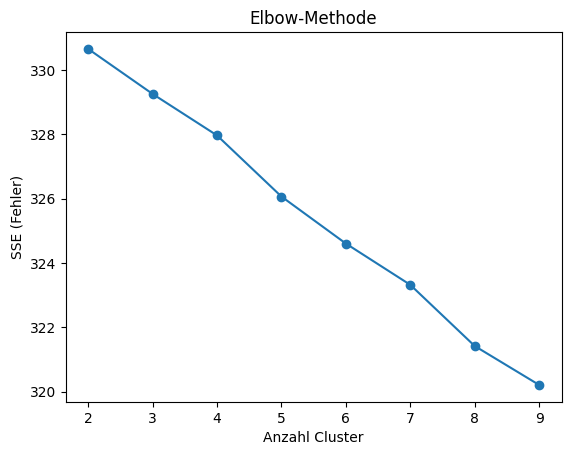

In [148]:
#Wie viele Cluster sind sinnvoll? (Elbow-Methode)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
K = range(2, 10)  # teste 2-9 Cluster

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(result)
    sse.append(km.inertia_)

plt.plot(K, sse, '-o')
plt.xlabel("Anzahl Cluster")
plt.ylabel("SSE (Fehler)")
plt.title("Elbow-Methode")
plt.show()

In [149]:
#Clustering mittels k-means
from sklearn.cluster import KMeans

#KMeans Clustering
k = 7  # Anzahl Cluster
model = KMeans(n_clusters=k, random_state=42)
model.fit(result)

#Cluster-Zuordnung pro Dokument
labels = model.labels_

for i, (doc, label) in enumerate(zip(posts, labels)):
    print(f"[Cluster {label}] {doc}")

[Cluster 2] Die Stadt des Feuers Der Neunaugensee Dunkel breitet sich das sehr tiefe Wasser, das bis an den Horizont im fernen Norden den Himmel berührt. Träge schlagen die Wellen an das Ufer an dem  sich das Schilf im sanften Wind wiest. In der weiten Ferne im glitzernden Wasser ragt majestätisch ein schwarzer Berg aus den Wellen und weißer Rauch steigt von seiner Spitze auf. Fern und doch unheimlich. Das ist Cealan, die verwunschene Insel die jeder Schiffer meidet. Sanfte Hügel und Wälder mit Gehöften und kleinen Dörfern dazwischen erstrecken sich dem gegenüber  ebenso  weit in den Süden. Und dazwischen verläuft die schier endlose Straße 60  Meilen zwischen der geschäftigen Stadt Trallop im Osten und dem  verschlafenen größeren Markt-Dorf Olat mit seiner Grafenburg Olats Feste, am  Rande  des riesigen Nebelmoores im Westen davon. Mehr  als ein Tagesmarsch und die Hälfte davon mit dem  Pferd. Und soweit erstreckt sich auch der Neunaugensee. Viele Sagen und Mythen und Sagen umranken di

In [150]:
#Welche Wörter charakterisieren jedes Cluster?
import numpy as np

words = tfidf.get_feature_names_out()
centers = model.cluster_centers_

for i in range(k):
    print(f"\nTop-Wörter Cluster {i}:")
    top_indices = centers[i].argsort()[::-1][:10]  #10 wichtigste Wörter
    print([words[idx] for idx in top_indices])


Top-Wörter Cluster 0:
['gehen', 'fragt', 'ritter', 'nindariel', 'bergor', 'brick', 'magier', 'olat', 'sumudan', 'gut']

Top-Wörter Cluster 1:
['boot', 'blickt', 'kurz', 'nindariel', 'herren', 'sumudan', 'sollten', 'gundar', 'dan', 'schon']

Top-Wörter Cluster 2:
['see', 'schrein', 'pandlaril', 'vielleicht', 'gibt', 'feuer', 'stadt', 'nindariel', 'morgen', 'dan']

Top-Wörter Cluster 3:
['antwortet', 'mehr', 'nindariel', 'harald', 'daher', 'darüber', 'stimmt', 'bisher', 'magus', 'gefährlich']

Top-Wörter Cluster 4:
['sumudan', 'haus', 'geht', 'nindariel', 'schon', 'tür', 'dan', 'sieht', 'guarion', 'bergor']

Top-Wörter Cluster 5:
['brick', 'bergor', '24698', 'gelöscht', 'erklärt', 'magier', 'harald', 'dank', 'gerne', 'herr']

Top-Wörter Cluster 6:
['hört', 'folgt', 'nindariel', 'ab', 'fasziniert', 'hakt', 'sumudan', 'geräusche', 'ausführungen', 'brick']


In [151]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

"""# PCA zur 2D-Visualisierung
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(result.toarray())

# Cluster-Farben
colors = ['red', 'blue', 'green', 'pink'] #, 'black', 'orange', 'grey'

plt.figure(figsize=(8, 6))
for i in range(k):
    points = tfidf_2d[labels == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f"Cluster {i}")

plt.title("2D-PCA Darstellung der Forenposts (KMeans Cluster)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()"""


'# PCA zur 2D-Visualisierung\npca = PCA(n_components=2)\ntfidf_2d = pca.fit_transform(result.toarray())\n\n# Cluster-Farben\ncolors = [\'red\', \'blue\', \'green\', \'pink\'] #, \'black\', \'orange\', \'grey\'\n\nplt.figure(figsize=(8, 6))\nfor i in range(k):\n    points = tfidf_2d[labels == i]\n    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f"Cluster {i}")\n\nplt.title("2D-PCA Darstellung der Forenposts (KMeans Cluster)")\nplt.xlabel("PCA 1")\nplt.ylabel("PCA 2")\nplt.legend()\nplt.show()'

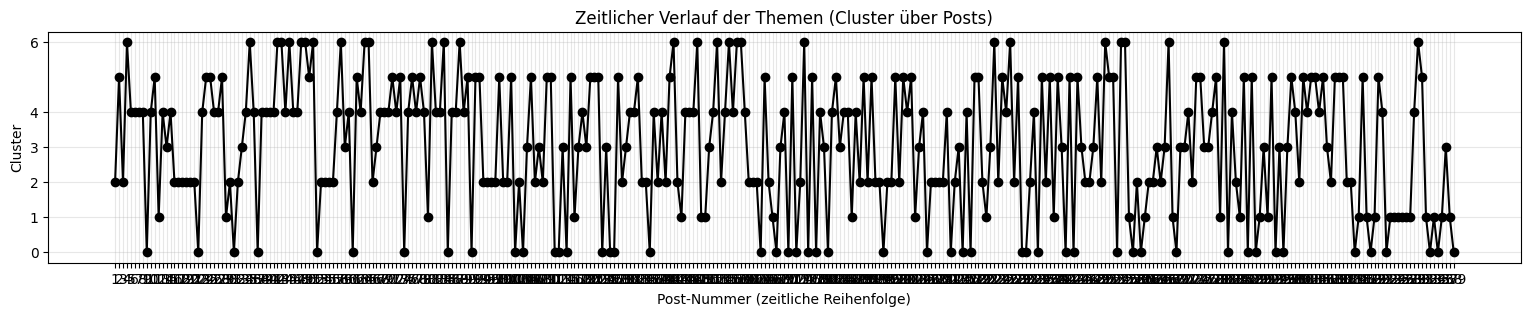

In [155]:
plt.figure(figsize=(19, 3))
plt.plot(range(1, len(labels)+1), labels, marker='o', linestyle='-', color='black')

plt.xticks(range(1, len(labels)+1))
plt.yticks([0, 1, 2, 3, 4, 6])
plt.xlabel("Post-Nummer (zeitliche Reihenfolge)")
plt.ylabel("Cluster")
plt.title("Zeitlicher Verlauf der Themen (Cluster über Posts)")

plt.grid(True, alpha=0.3)
plt.show()


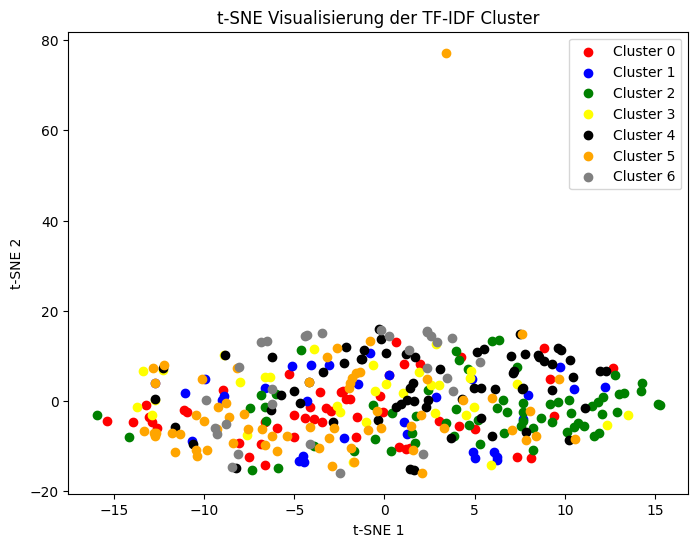

In [157]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# t-SNE erzeugen (2 Dimensionen)
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
tfidf_tsne = tsne.fit_transform(result.toarray())

# Plot
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', "yellow", 'black', 'orange', 'grey']

for i in range(k):
    pts = tfidf_tsne[labels == i]
    plt.scatter(pts[:, 0], pts[:, 1], c=colors[i], label=f"Cluster {i}")

plt.title("t-SNE Visualisierung der TF-IDF Cluster")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


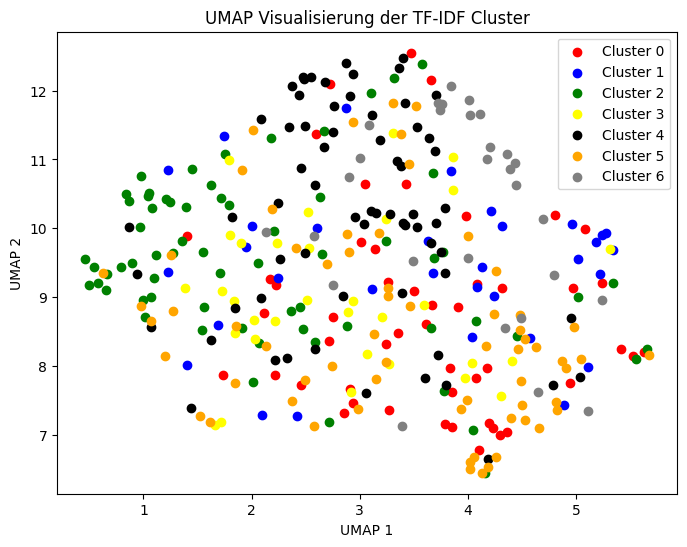

In [158]:
import umap
import matplotlib.pyplot as plt

# UMAP erzeugen
umap_model = umap.UMAP(n_components=2, random_state=42)
tfidf_umap = umap_model.fit_transform(result.toarray())

# Plot
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'yellow', 'black', 'orange', 'grey']

for i in range(k):
    pts = tfidf_umap[labels == i]
    plt.scatter(pts[:, 0], pts[:, 1], c=colors[i], label=f"Cluster {i}")

plt.title("UMAP Visualisierung der TF-IDF Cluster")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend()
plt.show()


IndexError: boolean index did not match indexed array along axis 0; size of axis is 367 but size of corresponding boolean axis is 339

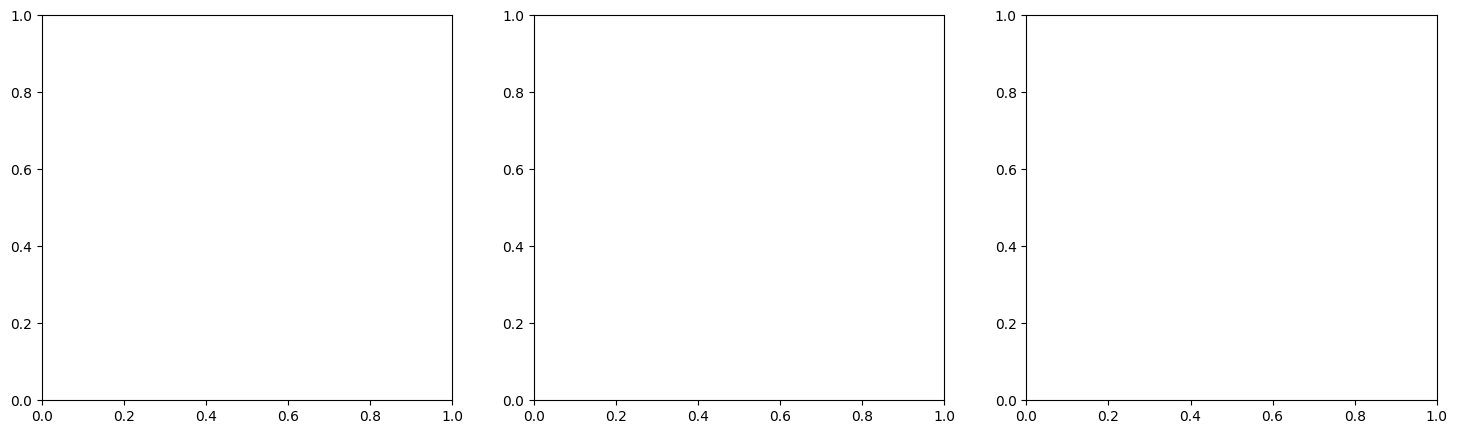

In [159]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

methods = {
    "PCA": tfidf_2d,
    "t-SNE": tfidf_tsne,
    "UMAP": tfidf_umap
}

for ax, (name, emb) in zip(axs, methods.items()):
    for i in range(k):
        pts = emb[labels == i]
        ax.scatter(pts[:, 0], pts[:, 1], c=colors[i], label=f"Cluster {i}")
    ax.set_title(name)
    ax.set_xticks([])
    ax.set_yticks([])

plt.legend()
plt.show()


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


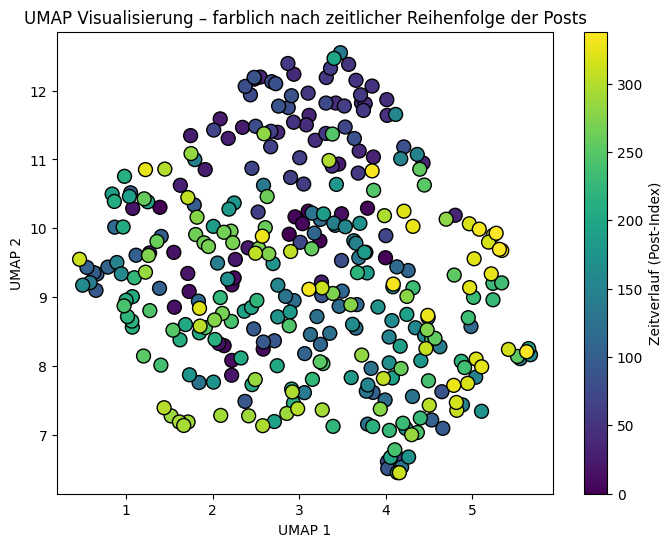

In [160]:
import umap
import matplotlib.pyplot as plt
import numpy as np

# UMAP berechnen (2D)
umap_model = umap.UMAP(n_components=2, random_state=42)
tfidf_umap = umap_model.fit_transform(result.toarray())

# Zeitindex = einfach die Reihenfolge 0,1,2,... der Dokumente
time_index = np.arange(len(posts))

plt.figure(figsize=(8, 6))

# Scatterplot: Farbe = Zeitverlauf
scatter = plt.scatter(
    tfidf_umap[:, 0],
    tfidf_umap[:, 1],
    c=time_index,
    cmap="viridis",
    s=100,
    edgecolors='black'
)

plt.colorbar(scatter, label="Zeitverlauf (Post-Index)")
plt.title("UMAP Visualisierung – farblich nach zeitlicher Reihenfolge der Posts")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

plt.show()


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_2233/3949641798.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter([], [], cmap="viridis", s=120, edgecolors="black")
/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


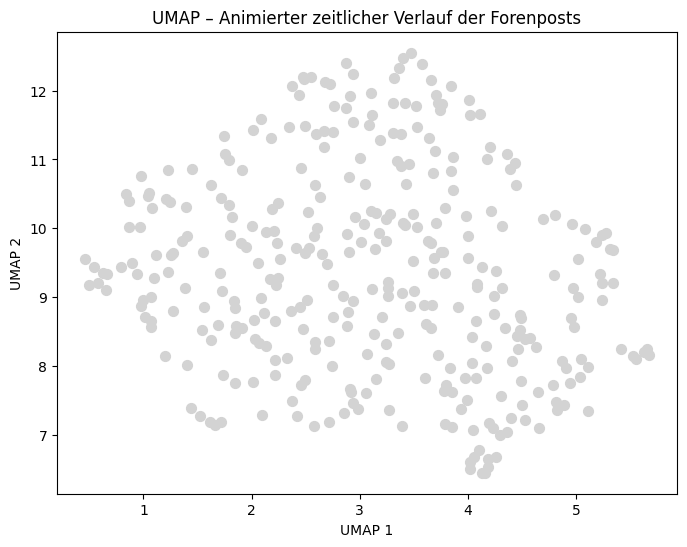

In [ ]:
import umap
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# UMAP berechnen
umap_model = umap.UMAP(n_components=2, random_state=42)
tfidf_umap = umap_model.fit_transform(result.toarray())

# Zeitindex
time_index = np.arange(len(posts))

fig, ax = plt.subplots(figsize=(8, 6))

# Hintergrundpunkte als Orientierung
ax.scatter(tfidf_umap[:, 0], tfidf_umap[:, 1], c='lightgray', s=50)

# Der animierte Scatter (leer starten, aber mit Farbe!)
scatter = ax.scatter(
    [], [],
    c=[],                   # WICHTIG: Liste für Farbdaten
    cmap="viridis",
    s=120,
    edgecolors="black",
    vmin=time_index.min(),  # Skalen fixieren
    vmax=time_index.max()
)

ax.set_title("UMAP – Animierter zeitlicher Verlauf der Forenposts")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")

# Update-Funktion
def update(frame):
    # Punkte bis zum aktuellen Frame
    current_x = tfidf_umap[:frame+1, 0]
    current_y = tfidf_umap[:frame+1, 1]
    scatter.set_offsets(np.c_[current_x, current_y])

    # Farben bis zum aktuellen Frame
    scatter.set_array(time_index[:frame+1])

    return scatter,

# Animation erzeugen
ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(docs),    # KORREKT: docs
    interval=800,
    repeat=False
)

# WICHTIG: Animation erhalten (verhindert "deleted" Warning)
plt.show()



/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


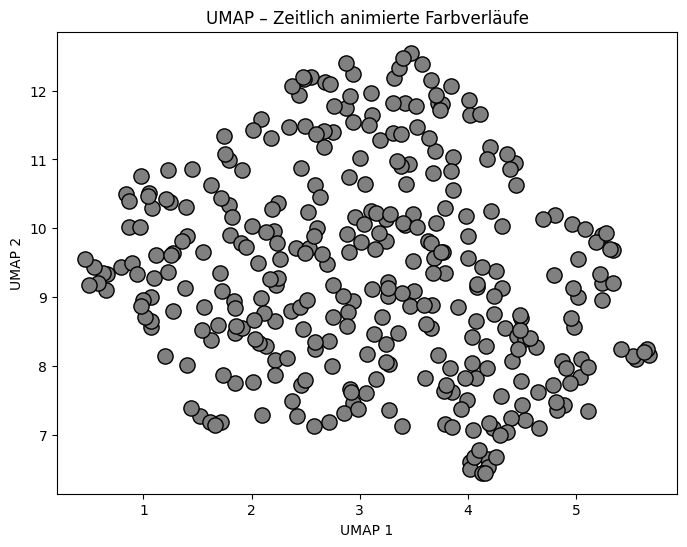

In [164]:
fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(
    tfidf_umap[:, 0],
    tfidf_umap[:, 1],
    c="gray",
    s=120,
    edgecolors="black"
)

ax.set_title("UMAP – Zeitlich animierte Farbverläufe")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")

def update(frame):
    # Gradient verschiebt sich
    colors = np.roll(time_index, -frame)
    scatter.set_array(colors)
    return scatter,

ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(posts),
    interval=800,
    repeat=True
)

plt.show()
